
# Optimization of squalene production in _Synechocystis sp._ PCC 6380


This work relies on the following packages for its execution:

    - cobra
    - cameo
    - tabulate
 
It must be noted that, to access the full suite of cameo functions, the cobra function find_gene_knockout_reactions must be added for the latest cobra version. To do so, we suggest updating the delete.py at Users/"user-name"/anaconda3/Lib/site-packages/cobra/manipulation with the one found in this repository. Be sure to change user-name to your respective repository.

In [1]:
#Necessary imports
import cobra
from cobra import Reaction, Metabolite, Model
from cobra.io import read_sbml_model
import cameo
from cameo import phenotypic_phase_plane
from cameo import models
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo import load_model
from cameo import phenotypic_phase_plane
from cameo.strain_design import OptGene
from tabulate import tabulate

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas

ModuleNotFoundError: No module named 'cameo'


## 1 Introduction



### 1.1 Relevance of squalene


Squalene (C30H50) is a triterpene which can be found in a wide variety of organisms, ranging from microorganisms to humans. It is a polyunsaturated hydrocarbon formed by six isoprene units. Up to date, squalene has been thoroughly investigated and research indicates that it plays crucial roles in steroid synthesis in humans, especially cholesterol and vitamins. Additionally, squalene is regarded as an important compound for maintaining health under toxic exposure, due to its chemoprotective and nutraceutical activities. Other properties of squalene include providing skin protection against high UV exposure, being an antioxidant and recent studies suggest it is also an anticancerous agent. Furthermore, outside from its biological environment, its emollient properties make it a good skin care product and it is being studied as a drug delivery agent (use of squalene emulsions), a detoxifier and an anti-infectant against bacteria and fungi. Laslty, if squalene could be produced sustainably and in large quantities, it could be used as a raw material for biofuels and as feedstock for the chemical industry. 

The global market size of squalene was valued at USD 121,55 million in 2021 and it is expected to expand at a compound annual growth rate (CAGR) of 10,9% from 2022 to 2030, the major factor driving this demand being the increase in personal care and cosmetics consumption. To supply this enourmous demand, squalene has traditionally been obtained from shark liver oil, although other sources include olive oil and some microorganisms. However, new regulations for marine animal protection activities have hampered the supply of squalene from shark liver oil. Consequently, there has been a shift towards more sustainable options: vegetal production (9,5% increase) and squalene obtained by fermentation processes through the use of photosynthetic microorganisms. 

Specifically, in prokaryotes, algae and plant plastids, isoprenoids are produced via the methyl-eythritol-4-phosphate (MEP) pathway, whereIPP and DMAPP are the basic building blocks for isoprenoids. In this study, focus is given to the synthesis of squalene using the cyanobacteria _Synechocystis sp._ PCC 6803. In this organism, the formation of squalene is catalysed by the enzyme squalene synthase, which performs a two-step reaction, where two molecules of farnesyl-diphosphate (FPP) are first combined to form presqualene diphosphate (PSPP), which is subsequently converted into squalene, in a NADPH-dependent step (Figure 1). 

Figure 1


### 1.2 _Synechocystis_ as a cell factory


_Synechocystis sp._ PCC 6803 is a photosynthetic microorganism found primarily in freshwater environments. One of the primary reasons this strain serves as an ideal cell factory is due to the extensive investigation of its functional genomics in recent decades, resulting in over 3000 gene annotations. This extensive genetic knowledge, coupled with this strains natural competence, makes it an ideal candidate for cell factory implementation. Furthermore, _Synechocystis_ can grow in photoautotrophic, heterotrophic, and mixotrophic conditions, which can provide advantages for carbon modulation during its large-scale implementation. Another reason this strain is an ideal cell factory candidate is due to its elevated stress tolerance, which is a key advantage for microbial hosts in terms of production efficiency, especially with scaling up. Furthermore, given that this strain is photosynthetic, contamination risks can be reduced when cultivated in photoautotrophic conditions, which is an advantage for reliable metabolite production. 

On the other hand, one disadvantage of using _Synechocystis_, and cyanobacterium more generally, as cell factory hosts, is their lower rate of production. Compared to other industry standards for cell factory production, such as bacterial and fungal hosts, cyanobacteria tend to produce target compounds at a slower rate, which simultaneously increases production costs and cultivation time, which also favours the risk of contamination. Furthermore, _Synechocystis_ titer is not competitive with alternatives such as _Escherichia coli_, meaning the rate of production and concentration of the product is not comparable with other microbial hosts. Such concerns, along with the cost of cultivation of cyanobacteria, make the practical and financial disadvantages of cyanobacterial cell factories clear. 

However, it must be noted that, while other chassis have been shown to be competent squalene producers, such as _Saccharomyces cerevisiae_ and _Yarrowia lipolytica_, one distinct advantage of _Synechocystis_ is its photoautotrophic capabilities and its stress resistance, which gives this strain the ability to have lower risk of contamination and greater resilience to scaling. Another advantage of using a photoautotroph as a cell factory is their impact on sustainability, as photosynthetic organisms require less energy and resources than other microorganisms, making it an energy efficient long-term choice for large scale squalene production. If compared to other photoautotrophic microbes that produce squalene, such as the aforementioned  _B. braunii_ and _Phormidium autumnale_, _Synechocystis_ has the distinct advantage of being better characterized in the literature, making it a better candidate for potential genetic modificaton and optimization strategies that can bolster squalene production. 

In regards to the production of squalene in cyanobacteria, specifically our species of interest, has been demonstrated by Englund et al. (2014), as they showcase the accumulation of squalene in this strain after inactivation of the slr2089 gene, thought to encode for squalene hopene cyclase, which converts squalene into hopene. This process was enhanced by Pattainaik et al. (2020), through the introduction of a heterologous squalene synthase from _Botryococcus braunii_ which increased squalene production. Given this proof of concept and the competence of this strain, _Synechocystis sp._ PCC 6803 is a suitable host for squalene production and optimization. 



 


## 2 Global and biological production limitations


Traditionally, squalene has been commercially produced from either shark liver oil or plant oils, e.g. olive oil. However, because the sources of those two methods are either not renewable or unstable and geographically restricted, the increasing global demand of squalene can hardly be fulfilled. Therefore, in this project, the cyanobacteria _Synechocystis_ will be used as a chassis for squalene production. 

Despite the advantage of using sunlight as energy source and converting directly carbon dioxide to products, both the titer or yield of squalene in _Synechocystis_ fermentation are relatively low, with reported value of titer at 5.1mg/L, and yield at 0.67 mg/OD750/L. Whereas, for organisms such as _Saccharomyces cerevisiae_, a titer of 21.1 g/L with the yield at 437.1 mg/g DCW has been achieved. To examine the feasibility and viability of using _Synechocystis_ for industrial squalene production, the focus of this project on a product level will be using Computer-aided Cell Factory Design to increase the yield of the product while ensuring an acceptable titer and productivity.  

The lower porduction of squalene can be due to host cell-related complications such as having slow growth rate, byproduct formation, and squalene accumulation. _Synechocystis_ lacks the transporters required for the transportation of vitamins, co-factors, amino acids or nucleotides. Hence, it relies on the energy generated from photosynthesis for the expression of synthetic pathways and essential building blocks, which slows down it growth rate and productivity. Furthermore, synthesis of byproducts such as carotenoids and hopanoids is also conducted through the same metabolic pathway which provides flux for squalene synthesis (Figure 2), thus creating another bottleneck for _Synechocystis_ based squalene production. In addition, squalene is a hydrophobic compound which is most likely to be accumulated in the cell membrane rather than being secreted. Hence, the production capacity of _Synechocystis_ will be limited with its concentration tolerance towards squalene accumulation, which will reduce its feasibility and viability to be used as an industrial host for large-scale production.  

Figure 2


## 3 Review of existing _Synechocystis_ GSMs


During the last decade, several genome scale reconstructions of _Synechocystis_ PCC 6803 have been published, as a response to the growing interest for the biosustainability potential of these organisms. For most models a different starting point or reconstruction approach has been used. Howevere, some of them rely upon each other to expand their networks. 

Amongst all of the found models, two stand out, as they are included in the BiGG Models database, which only publishes models with an NCBI RefSeq genome annotation and, thus, possess an additional level of reliability to them. The first of these reconstructions, named iJN678, is a robust model that focuses on the accurate modelling of the photosynthetic pathways. It includes 863 reactions and 795 nonunique metabolites, making use of various established databases like KEGG and Cyanobase. Additionally, to account for missing reactions in the model, the authors performed an iterative gap-filling. For this, they used data from phylogenetically close organisms, applying a confidence score to each reaction according to the evidence that supports its existence in _Synechocystis_. On the other hand, there is reconstruction iSynCJ816, hailing from a much more recent publication, and mainly focusing on the thermodynamic study and validation of the metabolic landscape. This model is substantially bigger than iJN678, with 1060 reactions and 925 metabolites, and makes use of the same databases. However, even though this model aims to unify the discrepancies between already published reconstructions, the authors did not conduct a gap-filling procedure, alleging that the gaps present in the model are gaps in our knowledge, which makes it the published model with the most gaps.  

All in all, both models seem to be adequate for cell factory design enterprises, but we have chosen iJN678 as the model for this work. From a validation point of view, iJN678 was published with a much more thorough description of the simulations used for its comparison with experimental data, ensuring that the predicted growth rate does not surpass more than 5% of the experimental value across its three different growth modes, mainly, autotrophic, mixotrophic and heterotrophic. In comparison, iSynCJ816 does not provide information regarding its validation, even though the same experimental dataset was used. Concurrently, through the assessment of both reconstructions conducted with Memote, it can be seen that iJN678 has a slightly higher score. This is due to the greater degree of metabolic coverage, the lower amount of stoichiometrically balanced cycles and unconserved and dead-end metabolites, amongst others. Additionally, iSynCJ816 is less annotated than iJN678, probably due to its larger number of genes, metabolites and reactions. 

So, for the established reasons, taking into account both its experimental validation and the _ad hoc_ analysis, we believe that the iJN678 reconstruction will facilitate reliable predictions throughout our analysis. 

In [ ]:
model=read_sbml_model('iJN678.xml')



## 4 Computer-aided engineering of _Synechocystis_ iJN678


modelM=read_sbml_model('iJN678mod.xml')Squalene is a native product of _Synechocystis_. Thus, there is no need to add a heterologous pathway to the model. However, to simulate overproduction of the compund, and to surpass the limits in its exportation, two additional reactions were added. Firstly, a transport reaction between the cytosol and the extracellular space was introduced. Reaction that is supported by the literature through the existance of the transporter [Yujing]. Secondly, an exchange reaction to eliminate squalene from the media was also added. Alltogether, the resulting model was exported as an SBML file named iJN678mod.

In [ ]:
modelM=read_sbml_model('iJN678mod.xml')


In [ ]:
modelM.reactions.get_by_id("R_SQLt")

In [ ]:
modelM.reactions.get_by_id("EX_sql_e")


### 4.1 Initial yields for squalene production


The maximum production yield has been calculated for each of the three growth modes of _Synechocystis_. Thus, the media has been adapted to that that allows its maximum growth rate in each of the conditions, autotrophic, mixotrophic and heterotrophic. For the last case, all the possible carbon sources were tested.

In [ ]:
#Setting medium for autotrophic (CO2 as carbon source)

co2KO=modelM.reactions.get_by_id("EX_co2_e")
photonKO=modelM.reactions.get_by_id("EX_photon_e")
hco3KO=modelM.reactions.get_by_id("EX_hco3_e")

co2KO.bounds=(-3.7,1000.0)
hco3KO.bounds= (-3.7,1000.0)
photonKO.bounds= (-100,0)

mediumKO = modelM.medium
mediumKO["EX_glc__D_e"] = 0.0
mediumKO["EX_hco3_e"] = 0.0
mediumKO["EX_photon_e"]=54.5
modelM.medium = mediumKO

modelM.objective="EX_sql_e"
modelM.optimize().objective_value

sql_production = modelM.optimize().objective_value
maximum_yield = sql_production / (-1*(modelM.reactions.EX_co2_e.flux))
print('Maximum productivity =', sql_production, 'mmol/gDW*h')
print('Maximum theoretical yield =', maximum_yield, 'mmol-sql/mmol-co2')

In [ ]:
#Setting medium for mixotrophic (Glucose as a carbon source but light availability)

co2KO.bounds=(0,1000.0)
hco3KO.bounds= (-3.7,1000.0)
photonKO.bounds= (-100,0)

mediumKO = modelM.medium
mediumKO["EX_glc__D_e"] = 0.39
mediumKO["EX_hco3_e"] = 0.0
mediumKO["EX_photon_e"]=54.5
modelM.medium = mediumKO

modelM.optimize()

sql_production = modelM.optimize().objective_value
maximum_yield = sql_production / (-1*(modelM.reactions.EX_glc__D_e.flux))
maximum_yield1 = sql_production / (-6*(modelM.reactions.EX_glc__D_e.flux))
print('Maximum productivity =', sql_production, 'mmol/gDW*h')
print('Maximum theoretical yield =', maximum_yield, 'mmol-sql/mmol-glc')
print('Maximum theoretical yield =', maximum_yield1, 'mmol-sql/mmolC')

In [ ]:
#Setting medium for heterotrophic

co2KO.bounds=(0,1000.0)
hco3KO.bounds= (0,1000.0)
photonKO.bounds= (0,0)

mediumKO = modelM.medium
mediumKO["EX_glc__D_e"] = 0.85
mediumKO["EX_hco3_e"] = 0.0
mediumKO["EX_photon_e"]=0
modelM.medium = mediumKO

modelM.optimize()

sql_production = modelM.optimize().objective_value
maximum_yield = sql_production / (-1*(modelM.reactions.EX_glc__D_e.flux))
print('Maximum productivity =', sql_production, 'mmol/gDW*h')
print('Maximum theoretical yield =', maximum_yield, 'mmol-sql/mmol-glc')

In [ ]:
#Production for alternate carbon sources

mediumKO = modelM.medium
mediumKO["EX_glc__D_e"] = 0
modelM.medium = mediumKO

EX = []
for reaction in model.exchanges:
    for metabolite in reaction.metabolites:
        if 'C' in metabolite.elements:
            EX.append(reaction.id)
            
#print(EX)


sol=[]

medium = modelM.medium
for i in range(len(EX)):
    with modelM:
        medium['EX_glc__D_e'] = 0 # remove glucose from medium
        medium[EX[i]] = 0.85 # add carbon source to medium
        modelM.medium = medium
        solution = modelM.slim_optimize(error_value=0.)
        maximum_yield = solution / (0.85)
        medium[EX[i]]=0.0
        list1=[]
        if solution > 0:
            list1.append(EX[i])
            list1.append(solution)
            list1.append(maximum_yield)
            sol.append(list1)
            
print(tabulate(sol, headers=['Reaction', 'Productivity (mmol-sql/gDWh)',"Yield (mmol-sql/mmol-glc)"]))

It can be seen that the best yield is obtained when _Synechocystis_ grows under mixotrophic conditions. However, for autotrophic conditions the productivity is substantially higher. Furthermore, the yield expressed in mmolC is identical, 0.033 mmol-sql/mmolC. So, it can be argued that, due to the ustainability benefits of using CO2, autotrophy is the best mode of operation for squalene production.

### 4.2 Phenotypic characterisation of the strain

We can now use the "phenotypic_phase_plane" package from cameo to visualize our strain performance of squalene production. We will begin by 
testing our strain in default autotrophic conditions. Next, we will set our CO2 levels to zero and turn on glucose use to simulate mixotrophic conditions. Next we will simulate anaerobic conditions by setting O2 to zero. This is followed by heterotrophic conditions where photosynthesis is turned off in our model. 


In [ ]:
# Autotrophic conditions

from cameo.visualization.plotting.with_plotly import PlotlyPlotter
plotter = PlotlyPlotter()

ppp = phenotypic_phase_plane(model,
                             variables=[model.reactions.BIOMASS_Ec_SynAuto],
                             objective=model.reactions.EX_sql_e)

ppp.plot(plotter)

In [ ]:
# Mixotrophic conditions

Mixo = modelM.copy()

mediumA = Mixo.medium
mediumA["EX_glc__D_e"] = 0.39
mediumA["EX_co2_e"] = 0

Mixo.medium = mediumA

Mixo.medium


In [ ]:
ppp2 = phenotypic_phase_plane(Mixo,
                             variables=[Mixo.reactions.BIOMASS_Ec_SynMixo],
                             objective=Mixo.reactions.EX_sql_e)

ppp2.plot(plotter)

In [ ]:
# Anaerobic conditions

Anaerobic = modelM.copy()

mediumB = Anaerobic.medium
mediumB["EX_o2_e"] = 0.0
Anaerobic.medium = mediumB

Anaerobic.medium

In [ ]:
ppp3 = phenotypic_phase_plane(Anaerobic,
                             variables=[Anaerobic.reactions.BIOMASS_Ec_SynAuto],
                             objective=Anaerobic.reactions.EX_sql_e)

ppp3.plot(plotter)

In [ ]:
# Heterotrophic conditions

Hetero = modelM.copy()

mediumH = Hetero.medium
mediumH["EX_photon_e"] = 0
mediumH["EX_glc__D_e"] = 0.85
mediumH["EX_co2_e"] = 0
Hetero.medium = mediumH

Hetero.medium

In [ ]:
ppp4 = phenotypic_phase_plane(Hetero,
                             variables=[Hetero.reactions.BIOMASS_Ec_SynHetero],
                             objective=Hetero.reactions.EX_sql_e)

ppp4.plot(plotter)

### 4.3 Alternative production pathways

In _Synechocystis sp. PCC 6803_ squalene production is achieved through sesquiterpenoid and triterpenoid biosynthesis pathway which uses farnesyl diphosphate (FPP) as a main precursor. Generation of the precursor, FPP, can be derived through two different pathways, mevalonate (MVA) and methylerythritol 4-phosphate (MEP) pathways. According to the genome analysis, _Synechocystis sp. PCC 6803_ does not possess the enzymetic reactions required for the MVA pathway, thus making MEP pathway the main flux stream towards squalene biosynthesis. Since, MVA and MEP pathwyas are the two main pathways leading to squalene production, incorparation of MVA pathway reactions can provide an additional side-stream beside the MEP pathway, thus increasing the flux towards the squalene production. In addition, incorporation of the MVA pathway also enables the utilizaiton of acetyl-CoA as an alternative substrate besides glyceraldehyde-3-phosphate which is used in MEP pathway. 

In [ ]:
![sql.png](attachment:sql.png)

In [ ]:
modelMVA= read_sbml_model("iJN678mva.xml")

### 4.4 Optimization through gene modulation strategies

To assess the possible gene knockouts, the OptGene algorithm has been run. From the results, the top five strain designs have been analysed in terms of maximum yield, plotting the phenotypic phase planes for each. However, it must be noted that, due to complications during the running of the algorithm, the reaction here studied is the first of the pathwya, that is, Pyruvate Kinase. An increase in its flux will increase the flux of the whole pathway, thus producing more squalene.

In [ ]:
optgene = OptGene(modelM)

In [ ]:
result = optgene.run(target=modelM.reactions.PYK,
                     biomass=modelM.reactions.BIOMASS_Ec_SynHetero,
                     substrate=modelM.metabolites.glc__D_e,
                     max_evaluations=5000,
                     plot=False)
result

In [ ]:
result.plot(plotter, 0)

In [ ]:
result.plot(plotter, 1)

In [ ]:
result.plot(plotter, 2)

In [ ]:
result.plot(plotter, 3)

In [ ]:
result.plot(plotter, 4)

In [ ]:
result.plot(plotter, 5)

Similarly, the same process was conducted with the model with the MVA pathway. This time, also using the first reaction of the pathway, Acetyl-CoA C-acetyltransferase, due to the same computational limitations.

In [ ]:
optgene = OptGene(modelMVA)

In [ ]:
result = optgene.run(target=modelMVA.reactions.R_MVA0,
                     biomass=modelMVA.reactions.BIOMASS_Ec_SynHetero,
                     substrate=modelMVA.metabolites.glc__D_e,
                     max_evaluations=5000,
                     plot=False)
result

In [ ]:
result.plot(plotter, 0)

In [ ]:
result.plot(plotter, 1)

In [ ]:
result.plot(plotter, 2)

In [ ]:
result.plot(plotter, 3)

In [ ]:
result.plot(plotter, 4)

In [ ]:
result.plot(plotter, 5)

To improve the oduction of squalene, overexpression could be done to several genes in the production pathway. 

In [3]:
from cobra.flux_analysis import flux_variability_analysis
#Model input
modelOE=read_sbml_model('iJN678mod.xml')

In [4]:
#change the culture condition to be fully autotrophic as production needed
co2OE=modelOE.reactions.get_by_id("EX_co2_e")
photonOE=modelOE.reactions.get_by_id("EX_photon_e")
hco3OE=modelOE.reactions.get_by_id("EX_hco3_e")

co2OE.bounds=(-3.7,1000.0)
hco3OE.bounds= (-3.7,1000.0)
photonOE.bounds= (-100,0)

medium = modelOE.medium
medium["EX_glc__D_e"] = 0.0
medium["EX_hco3_e"] = 0.0
medium["EX_photon_e"]=54.5
modelOE.medium = medium
print("The genes that could be overexpressed are:")
print("sll0513, encoding: Squalene synthase" , modelOE.reactions.get_by_id("SQLS"))
print("sll1945, encoding: 1-deoxy-D-xylulose 5-phosphate synthase:" , modelOE.reactions.get_by_id("DXPS"))
print("sll1556, encoding: Isopentenyl-diphosphate D-isomerase" , modelOE.reactions.get_by_id("IPDDI"))
print("pys, encoding: Geranyltranstransferase" , modelOE.reactions.get_by_id("GRTT"))

The genes that could be overexpressed are:
sll0513, encoding: Squalene synthase SQLS: 2.0 frdp_c + h_c + nadph_c --> nadp_c + 2.0 ppi_c + sql_c
sll1945, encoding: 1-deoxy-D-xylulose 5-phosphate synthase: DXPS: g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c
sll1556, encoding: Isopentenyl-diphosphate D-isomerase IPDDI: ipdp_c <=> dmpp_c
pys, encoding: Geranyltranstransferase GRTT: grdp_c + ipdp_c --> frdp_c + ppi_c


In [5]:
#change objective to squalene production
modelOE.objective = "EX_sql_e"
print("The theoretical maximum Squalene production rate is: ", modelOE.optimize().objective_value, "mmol/gdcw/h")
print("The CO2, carbon source, uptake rate is: ", -modelOE.optimize().fluxes['EX_co2_e'], "mmol/gdcw/h")
print("The biomass production under this condition is: " , modelOE.optimize().fluxes['BIOMASS_Ec_SynAuto'], "/h")

The theoretical maximum Squalene production rate is:  0.1233333333333334 mmol/gdcw/h
The CO2, carbon source, uptake rate is:  3.7 mmol/gdcw/h
The biomass production under this condition is:  0.0 /h


In [6]:
modelOE.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,3.7,1,100.00%
h2o_e,EX_h2o_e,3.083,0,0.00%
h_e,EX_h_e,0.1233,0,0.00%
photon_e,EX_photon_e,49.33,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
o2_e,EX_o2_e,-5.242,0,0.00%
sql_e,EX_sql_e,-0.1233,0,0.00%


The objective of the model is now changed to producing squalene from using CO2 as carbon source.

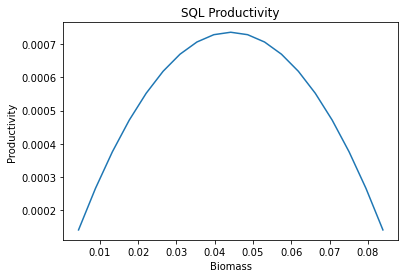

In [7]:
x=[]
y=[]
z=[]
k=[]
Biomass=[]
Productivity=[]
SQL=[]
optimum_value=[]
with modelOE:
        medium = modelOE.medium
        modelOE.objective = "EX_sql_e"
        optimum=modelOE.optimize().objective_value
        i=0.05
        while i<1:
            FVA=flux_variability_analysis(modelOE,modelOE.reactions.BIOMASS_Ec_SynAuto,fraction_of_optimum=i)
            Biomass.append(FVA.maximum.item())
            Productivity.append(-i*optimum*FVA.maximum.item()/modelOE.optimize().fluxes['EX_co2_e'])
            SQL.append(i*optimum)
            optimum_value.append(i)
            i+=0.05 
        x.append(Biomass)
        y.append(Productivity)
        z.append(SQL)
        k.append(optimum_value)

import matplotlib.pyplot as plt
for i in range (0,len(y)):
    plt.figure()
    plt.plot(x[i],y[i])
    plt.xlabel("Biomass")
    plt.ylabel("Productivity")
    plt.title('SQL Productivity') 
plt.show()

The plot shows the productivity vs biomass. As it can be seen, the productivity reaches its maximum when biomass is controlled at a mdedium level.

In [8]:
Biomass_sorted,Productivity_sorted,SQLsorted,optimum_value_sorted = zip(*sorted(list(zip(Biomass, Productivity,SQL,optimum_value)), key=lambda item: item[1], reverse=True))
print("The highest productivity will be reached when:")
print("growth rate is ", Biomass_sorted[1], "/h,")
print("and the corresponding productivity will be", Productivity_sorted[1], "mol/mol/h")
print("The squalene production rate will be",SQLsorted[1], "mmol/gdcw/h." )
print("The optimum value set for production of SQL is",  optimum_value_sorted[1])

The highest productivity will be reached when:
growth rate is  0.04859441594166733 /h,
and the corresponding productivity will be 0.0007289162391250104 mol/mol/h
The squalene production rate will be 0.05550000000000004 mmol/gdcw/h.
The optimum value set for production of SQL is 0.44999999999999996


In [9]:
#set the bounds of SQLS
modelOE.reactions.get_by_id('SQLS').bounds = (0.06783333333333337,0.06783333333333337)
print("The optimal fluxes of the reaction corresponding to the overexpression genes are:")
print("For Squalene synthase: ", modelOE.optimize().fluxes['SQLS'])
print("For 1-deoxy-D-xylulose 5-phosphate synthase:" , modelOE.optimize().fluxes['DXPS'])
print("For Isopentenyl-diphosphate D-isomerase" , modelOE.optimize().fluxes["IPDDI"], "#reversible reaction")
print("For Geranyltranstransferase" , modelOE.optimize().fluxes["GRTT"])

The optimal fluxes of the reaction corresponding to the overexpression genes are:
For Squalene synthase:  0.06783333333333337
For 1-deoxy-D-xylulose 5-phosphate synthase: 0.4143385517945843
For Isopentenyl-diphosphate D-isomerase 0.0 #reversible reaction
For Geranyltranstransferase 0.13750203523663862


In [10]:
#To compare with model optimised for cell growth
model_growth=read_sbml_model('iJN678mod.xml')  
model_growth.objective = "BIOMASS_Ec_SynAuto"

print("Compare the optimum flux with original model optimised only for cell growth, the expression levels are increased as follows:")
print("For Squalene synthase: the flux increased from", model_growth.optimize().fluxes['SQLS'], "to", modelOE.optimize().fluxes['SQLS'])
print("For 1-deoxy-D-xylulose 5-phosphate synthase, flux increased by:" , modelOE.optimize().fluxes['DXPS']*100/model_growth.optimize().fluxes['DXPS'], "%")
ipddiflux=flux_variability_analysis(model_growth,model_growth.reactions.get_by_id("IPDDI"),fraction_of_optimum=1)
ipddi_increase = (modelOE.optimize().fluxes["IPDDI"]-ipddiflux.minimum.item())*100/(model_growth.optimize().fluxes["IPDDI"]-ipddiflux.minimum.item())
print("For Isopentenyl-diphosphate D-isomerase , flux increased by:", ipddi_increase, "%, in the direction of favouring Isopentenyl diphosphate")
print("For Geranyltranstransferase, flux increased by:" , modelOE.optimize().fluxes["GRTT"]*100/model_growth.optimize().fluxes["GRTT"], "%")

Compare the optimum flux with original model optimised only for cell growth, the expression levels are increased as follows:
For Squalene synthase: the flux increased from 0.0 to 0.06783333333333337
For 1-deoxy-D-xylulose 5-phosphate synthase, flux increased by: 3885.7421363707817 %
For Isopentenyl-diphosphate D-isomerase , flux increased by: 74.99004406662613 %, in the direction of favouring Isopentenyl diphosphate
For Geranyltranstransferase, flux increased by: 5156.02284510191 %


### 4.5 Simulation of batch cultivations

### 4.6 Assessment of the predicted strains

## 5. Discussion (<500 words)

## 6. Conclusion (<200 words)

## References